<a href="https://colab.research.google.com/github/Virajkd/ECE-curriculum-analysis-for-colleges/blob/main/Code_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import networkx as nx
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
file_name = '/content/drive/MyDrive/Crowd_management/ECE_final.xlsx'
df = pd.read_excel(file_name)

In [ ]:
# Load the data from a single Excel sheet
data1 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet1')
data2 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet2')
data3 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet3')
data4 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet4')
data5 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet5')
data6 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet6')
data7 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet7')
data8 = pd.read_excel('/content/drive/MyDrive/Crowd_management/ECE_final.xlsx', sheet_name='Sheet8')

data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8], ignore_index=True)

In [ ]:
data['Subject'] = data['Subject'].fillna('').str.lower().str.replace('[^a-z0-9 ]', '', regex=True)

vectorizer = CountVectorizer().fit_transform(data['Subject'])

vectors = vectorizer.toarray()

cosine_sim = cosine_similarity(vectors)

similarity_df = pd.DataFrame(cosine_sim, index=data['Subject'], columns=data['Subject'])

print("Course Similarity Matrix:")
print(similarity_df)

similarity_df.to_csv('course_similarity_matrix.csv')

Course Similarity Matrix:
Subject                                       engineering mathematics   \
Subject                                                                  
engineering mathematics                                       1.000000   
engineering chemistry                                         0.500000   
introduction to python programming                            0.000000   
principles of electrical and electronics                      0.000000   
elements of mechanical and civil engineering                  0.288675   
...                                                                ...   
open elective4                                                0.000000   
major project phase2                                          0.000000   
btech project  thesis  internship                             0.000000   
project phase ii                                              0.000000   
major project                                                 0.000000   

Subject    

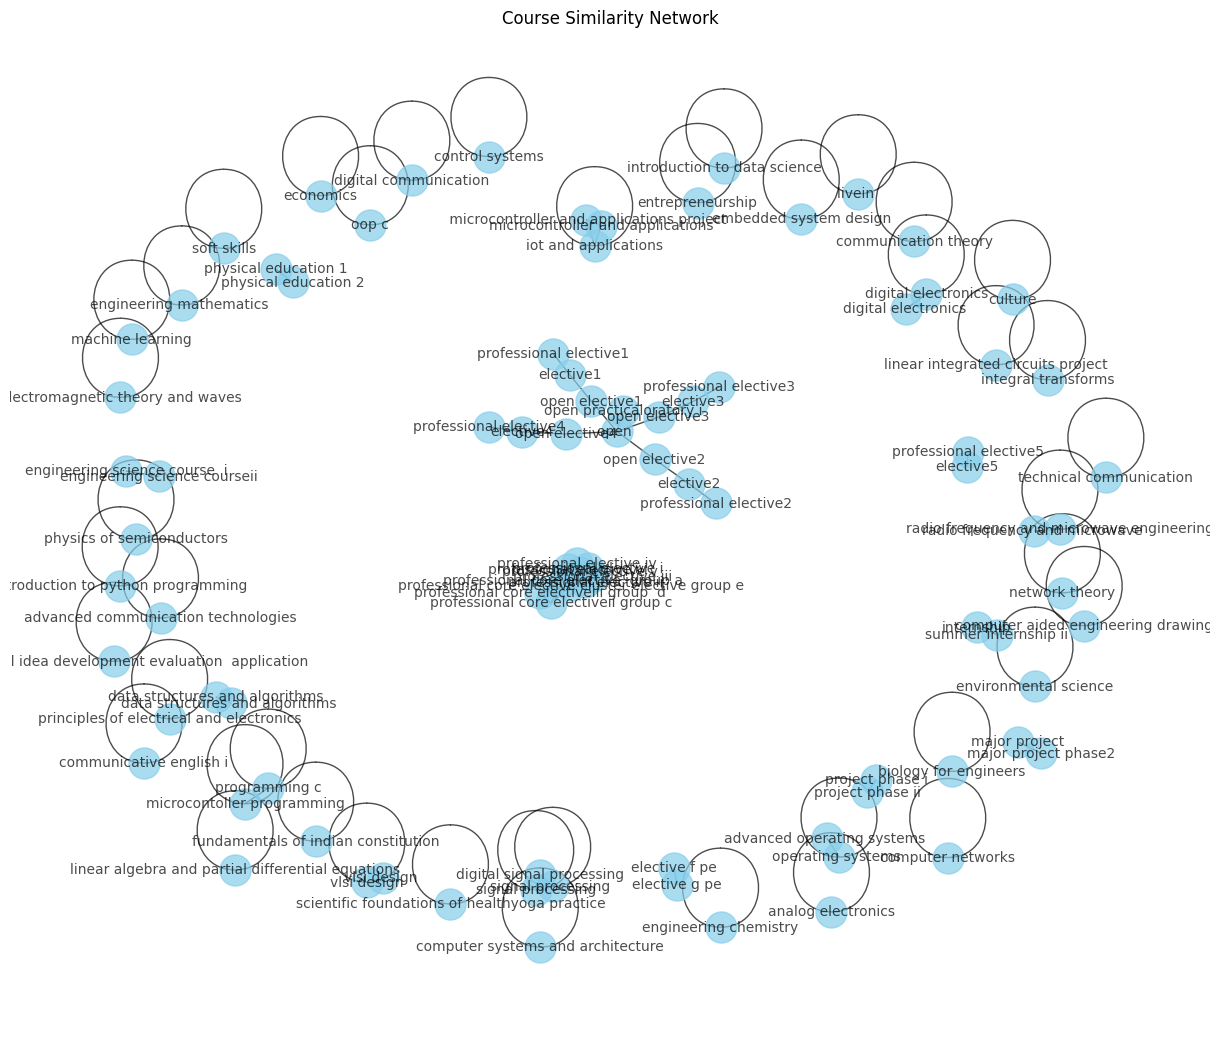

In [ ]:
G = nx.Graph()
threshold = 0.5
for i in range(len(similarity_df)):
  for j in range(i + 1, len(similarity_df)):
    if similarity_df.iloc[i, j] > threshold:
        G.add_edge(similarity_df.index[i], similarity_df.columns[j], weight=similarity_df.iloc[i, j])


plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', alpha=0.7, font_size=10)
plt.title('Course Similarity Network')
plt.show()

In [ ]:
overlap_counts = data['Subject'].value_counts()
common_courses = overlap_counts[overlap_counts > 1]
print("Courses offered in multiple semesters:")
print(common_courses)

Courses offered in multiple semesters:
Subject
                                                           211
soft skills                                                  9
communication theory                                         8
analog electronics                                           7
signal processing                                            6
programming c                                                6
culture                                                      5
physics of semiconductors                                    4
computer networks                                            4
environmental science                                        4
microcontoller programming                                   4
introduction to data science                                 4
integral transforms                                          4
engineering mathematics                                      4
network theory                                               4
principl

<ipython-input-9-17b24ff97e9b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=semester_popularity.index, y=semester_popularity.values, palette='viridis')


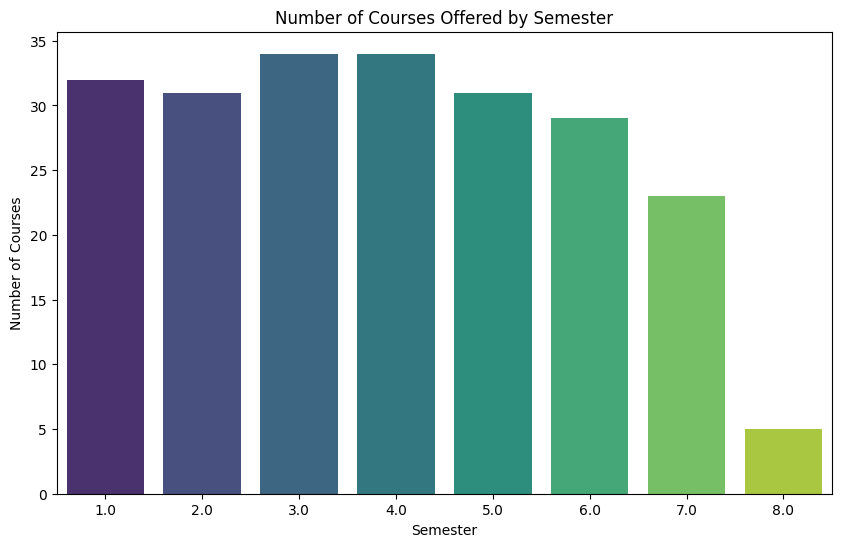

In [ ]:
semester_popularity = data['Sem'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=semester_popularity.index, y=semester_popularity.values, palette='viridis')
plt.title('Number of Courses Offered by Semester')
plt.xlabel('Semester')
plt.ylabel('Number of Courses')
plt.show()

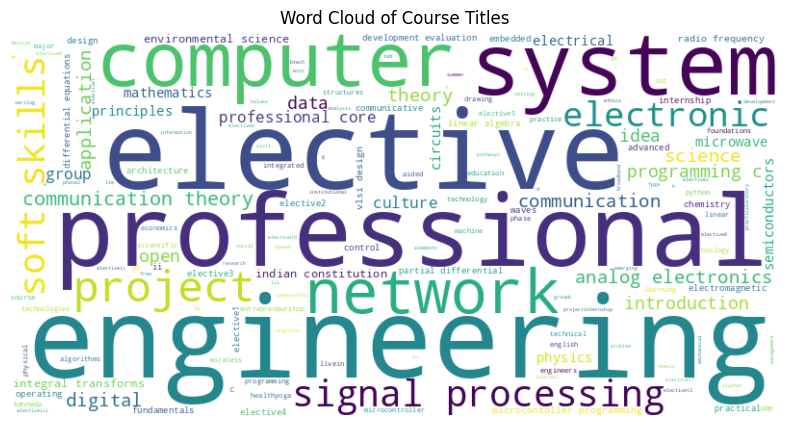

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data['Subject']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Course Titles')
plt.show()

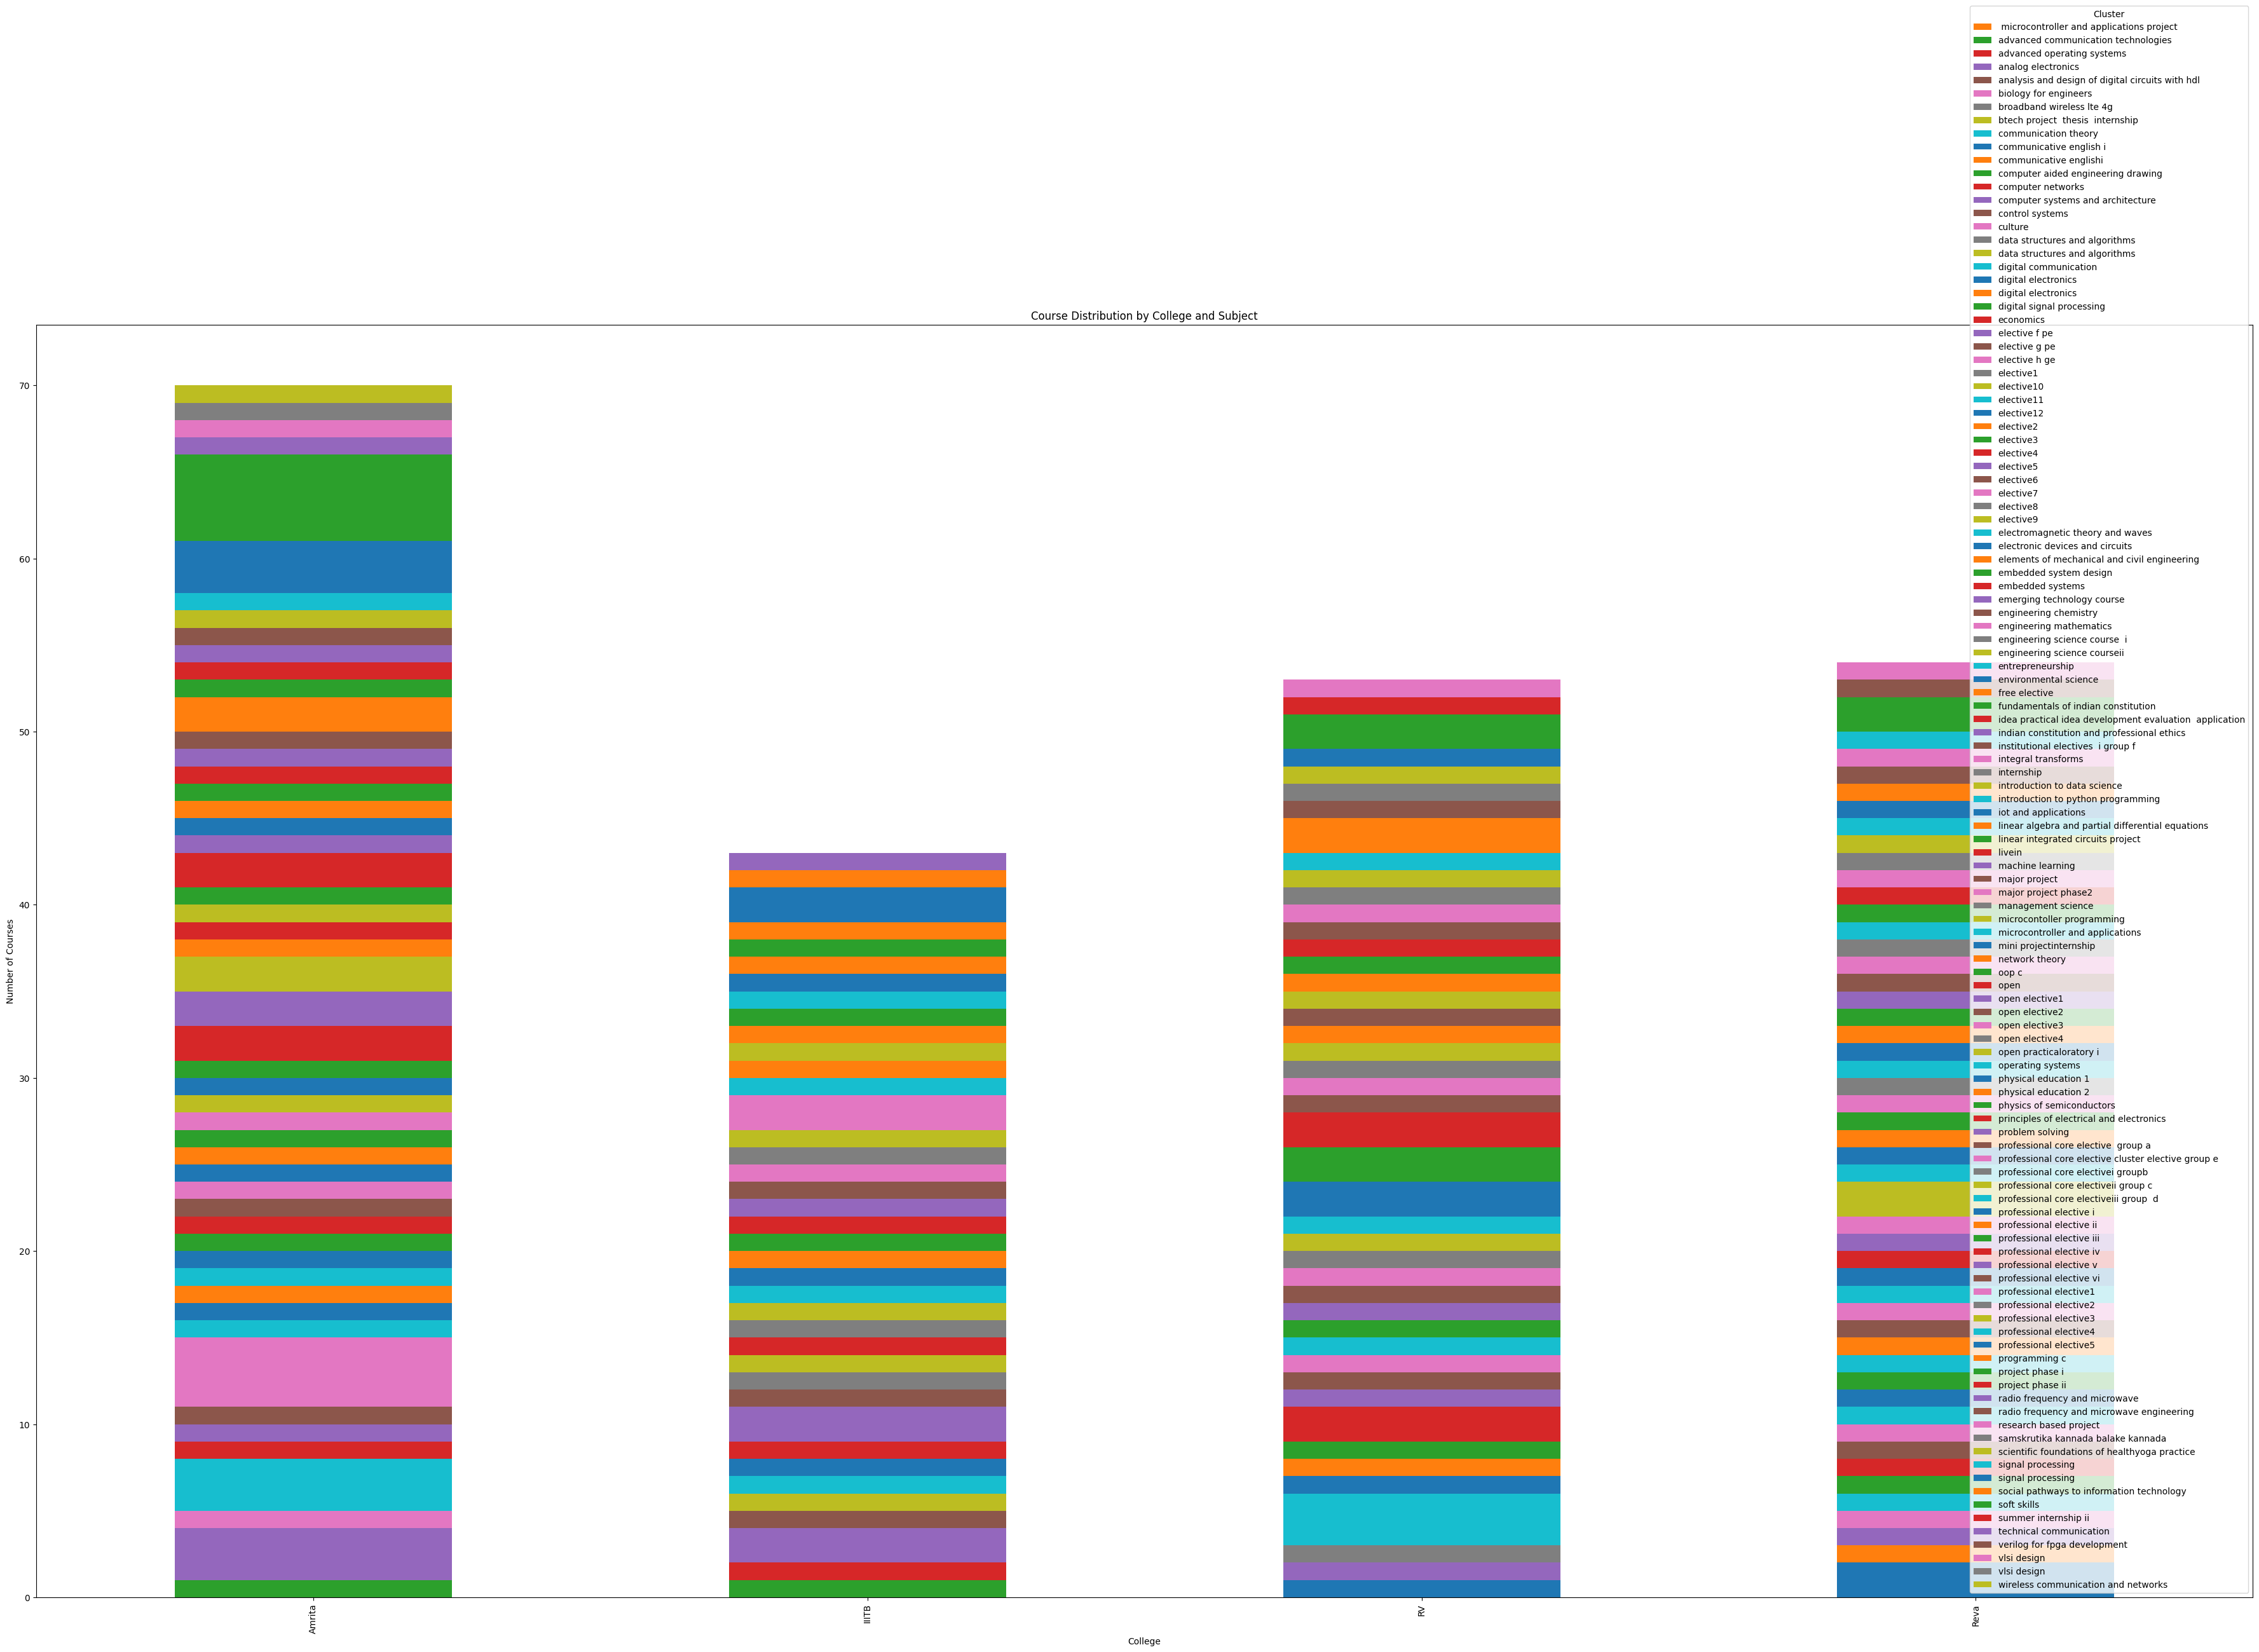

In [ ]:
college_distribution = data.groupby(['Offered by', 'Subject']).size().unstack(fill_value=0)
college_distribution.plot(kind='bar', stacked=True, figsize=(45, 26))
plt.title('Course Distribution by College and Subject')
plt.xlabel('College')
plt.ylabel('Number of Courses')
plt.legend(title='Cluster')
plt.show()

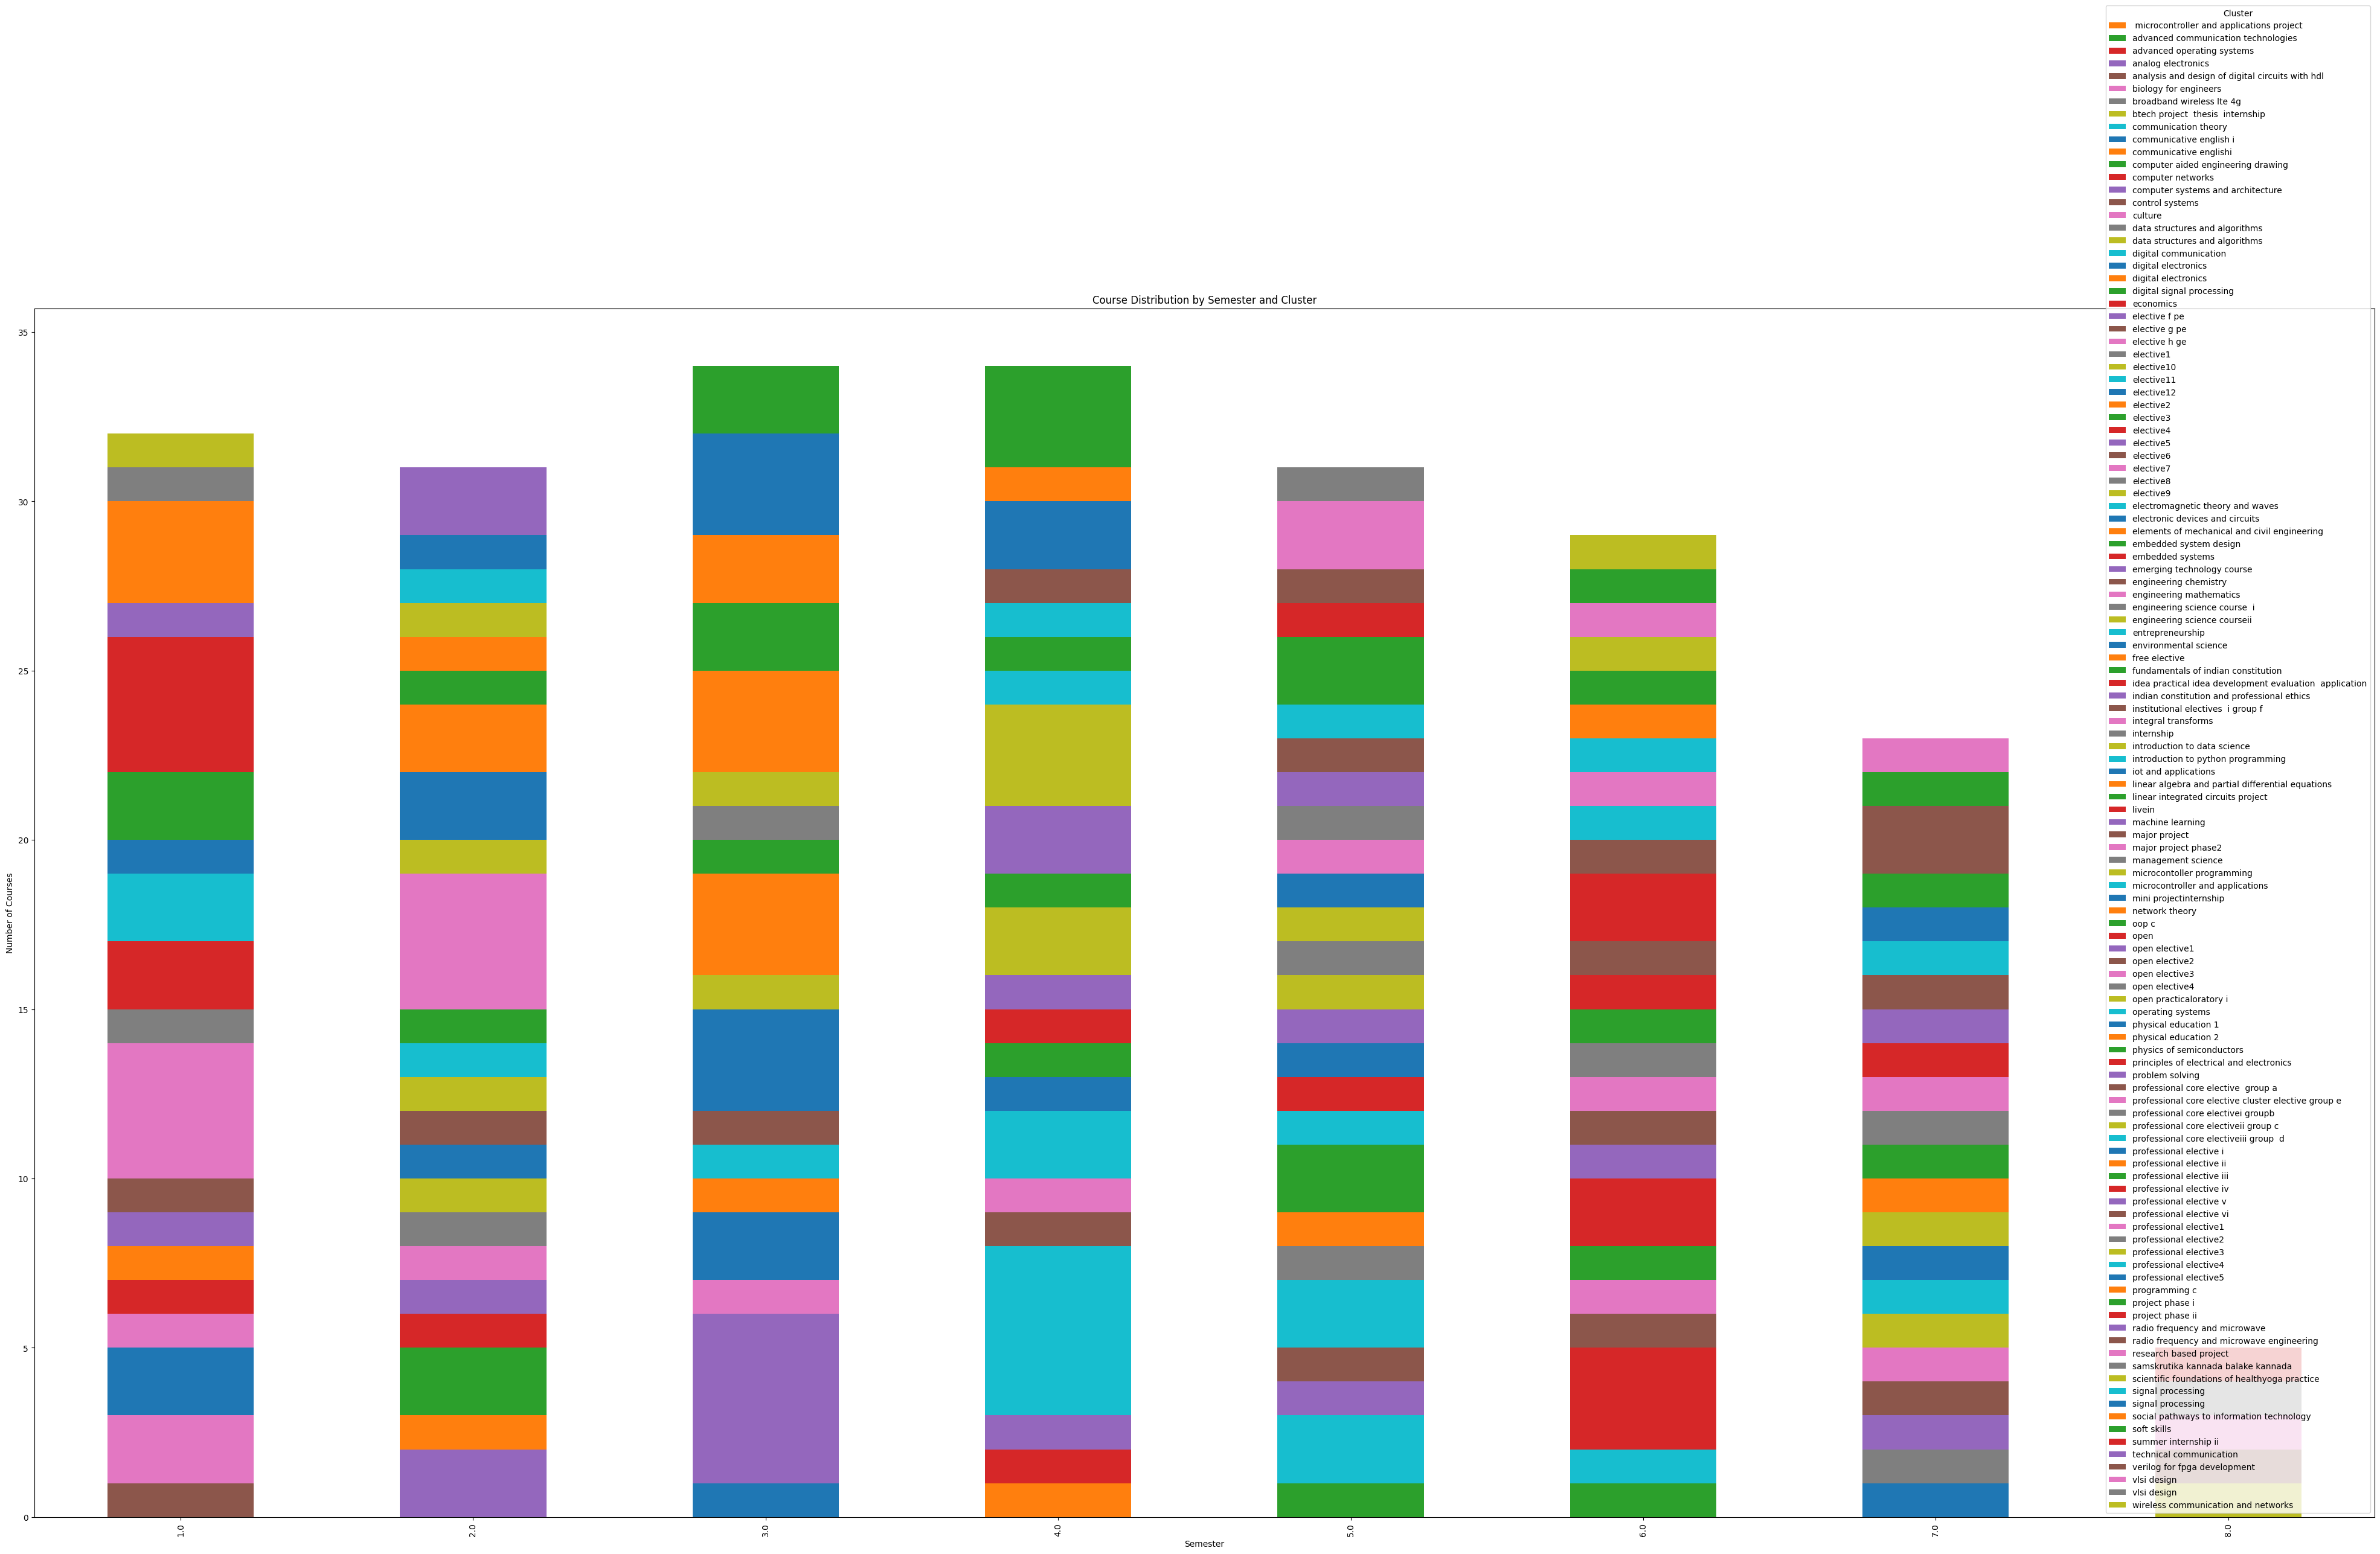

In [ ]:
cluster_distribution = data.groupby(['Sem', 'Subject']).size().unstack(fill_value=0)
cluster_distribution.plot(kind='bar', stacked=True, figsize=(50, 26))
plt.title('Course Distribution by Semester and Cluster')
plt.xlabel('Semester')
plt.ylabel('Number of Courses')
plt.legend(title='Cluster')
plt.show()